In [2]:
# PyMechanical
from mecha import networks
from mecha import response_optimization
from mecha import plotting

# Other things
import numpy as np
import scipy as sp
import networkx as nx # NetworkX is a requirement

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Some preprogrammed networks

# 2d triangular grid
triang_grid = networks.TriangularGrid2D(n=6, x_periodic=True, y_periodic=True)

# 2d randomized
delaunay = networks.DelaunayNetwork(dimension=2, n=36, copy_unit_cell=[0, 1]).make_periodic()

# 3d triangular
triang3d = networks.TriangularGrid3D(4, copy_unit_cell=[0, 1, 2]).make_periodic()

<IPython.core.display.Javascript object>


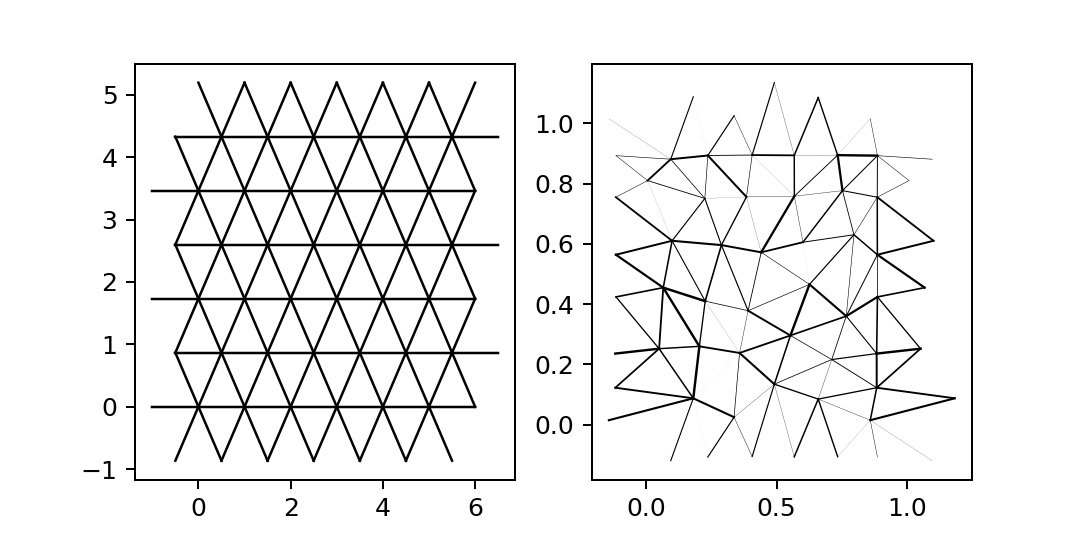

In [4]:
f, ax = plt.subplots(1, 2, figsize=(6, 3))

widths = np.ones(triang_grid.number_of_edges())
triang_grid.draw_edges_2d(widths, ax[0])

widths = np.random.rand(delaunay.number_of_edges())
delaunay.draw_edges_2d(widths, ax[1]);

<IPython.core.display.Javascript object>


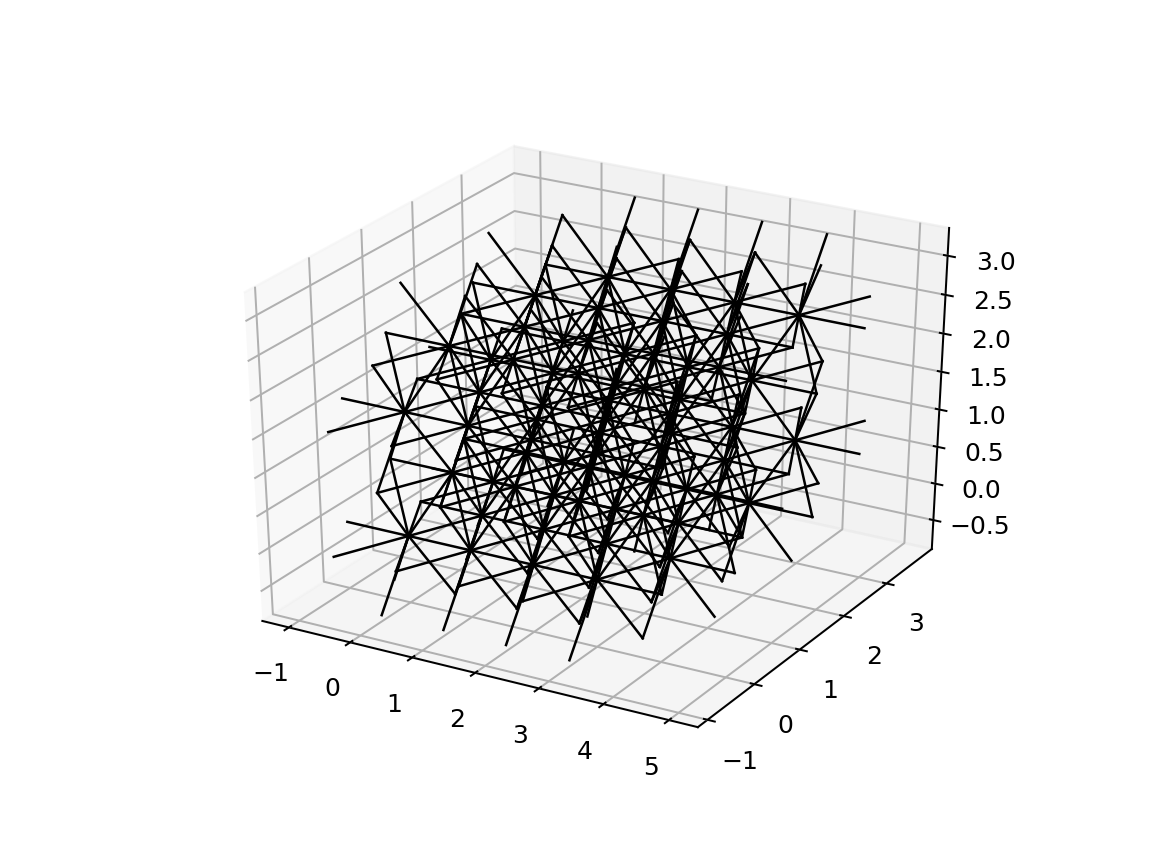

In [5]:
f = plt.figure()
ax = f.add_subplot(111, projection="3d")

triang3d.draw_edges_3d(np.ones(triang3d.number_of_edges()), ax)

In [6]:
# Lots of information in the .graph attribute

triang_grid.graph

{'dimension': 2,
 'linear_length': 6,
 'x_periodic': True,
 'y_periodic': True,
 'periods': (6.0, 5.196152422706632),
 'edgelist': [((0, 0), (1, 0)),
  ((0, 0), (5, 0)),
  ((0, 0), (0, 1)),
  ((0, 0), (5, 1)),
  ((0, 0), (0, 5)),
  ((0, 0), (5, 5)),
  ((1, 0), (2, 0)),
  ((1, 0), (1, 1)),
  ((1, 0), (0, 1)),
  ((1, 0), (1, 5)),
  ((1, 0), (0, 5)),
  ((5, 0), (4, 0)),
  ((5, 0), (5, 1)),
  ((5, 0), (4, 1)),
  ((5, 0), (5, 5)),
  ((5, 0), (4, 5)),
  ((0, 1), (1, 1)),
  ((0, 1), (5, 1)),
  ((0, 1), (0, 2)),
  ((0, 1), (1, 2)),
  ((5, 1), (4, 1)),
  ((5, 1), (5, 2)),
  ((5, 1), (0, 2)),
  ((0, 5), (1, 5)),
  ((0, 5), (5, 5)),
  ((0, 5), (0, 4)),
  ((0, 5), (1, 4)),
  ((5, 5), (4, 5)),
  ((5, 5), (5, 4)),
  ((5, 5), (0, 4)),
  ((1, 1), (2, 1)),
  ((1, 1), (1, 2)),
  ((1, 1), (2, 2)),
  ((1, 1), (2, 0)),
  ((0, 2), (1, 2)),
  ((0, 2), (5, 2)),
  ((0, 2), (0, 3)),
  ((0, 2), (5, 3)),
  ((1, 2), (2, 2)),
  ((1, 2), (1, 3)),
  ((1, 2), (0, 3)),
  ((5, 2), (4, 2)),
  ((5, 2), (5, 3)),
  ((5, 2),

In [7]:
# networks are dicts (they inherit from the NetworkX.Graph object and can do anything NetworkX graphs can do)

# node attributes
triang_grid[(0,0)]

AtlasView({(1, 0): {'length': 1, 'b_hat_0': 1, 'b_hat_1': 0, 'periodic': False, 'a': array([0, 0])}, (5, 0): {'length': 1, 'b_hat_0': -1, 'b_hat_1': 0, 'periodic': True, 'a': array([-1,  0])}, (0, 1): {'length': 1, 'b_hat_0': 0.5, 'b_hat_1': 0.8660254037844386, 'periodic': False, 'a': array([0, 0])}, (5, 1): {'length': 1, 'b_hat_0': -0.5, 'b_hat_1': 0.8660254037844386, 'periodic': True, 'a': array([-1,  0])}, (0, 5): {'length': 1, 'b_hat_0': 0.5, 'b_hat_1': -0.8660254037844386, 'periodic': True, 'a': array([ 0, -1])}, (5, 5): {'length': 1, 'b_hat_0': -0.5, 'b_hat_1': -0.8660254037844386, 'periodic': True, 'a': array([-1, -1])}})

In [8]:
# edge attributes
triang_grid[(0,0)][(1,0)]

{'length': 1,
 'b_hat_0': 1,
 'b_hat_1': 0,
 'periodic': False,
 'a': array([0, 0])}

In [9]:
# make your own network

netw = networks.MechanicalNetwork(dimension=2)

#             node id, position
netw.add_node(0,      x=np.array([0, 0]))
netw.add_node(1,      x=np.array([0, 1]))
netw.add_node(2,      x=np.array([1, 0]))

# connect node id's by edges
netw.add_edge(0, 1)
netw.add_edge(1, 2)
netw.add_edge(2, 0)

# initialize and calculate all edge lists, matrices, etc...
netw.init_attrs()

<IPython.core.display.Javascript object>


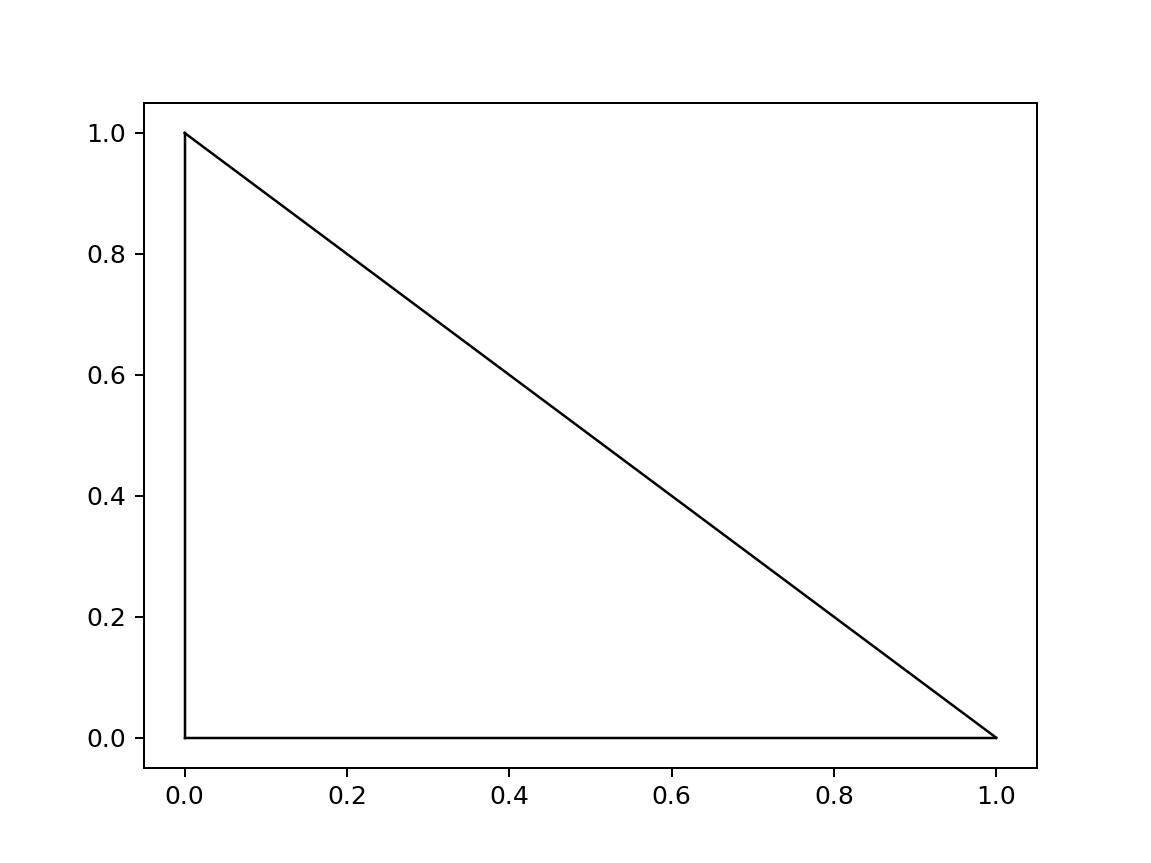

In [10]:
# plot the network we just made
f, ax = plt.subplots()

widths = np.ones(netw.number_of_edges())
netw.draw_edges_2d(widths, ax)

In [11]:
# some potentially useful stuff

# compatibility matrix
netw.graph['Q']

<6x3 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Column format>

In [12]:
# incidence matrix
netw.graph['E']

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

In [13]:
# unit vectors in direction of edge
netw.graph['b_hat']

array([[ 0.        ,  1.        ],
       [ 0.70710678, -0.70710678],
       [-1.        ,  0.        ]])

In [53]:
# optimize a network with a bandgap

# triangular grid
triang1 = networks.TriangularGrid2D(n=4, x_periodic=True, y_periodic=True)

# length of the unit cell in x and y direction
a, b = triang1.graph['periods']

# 4x4 uniform wavevectors to optimize over
qs = plotting.sample_brillouin(triang1, 4)

# optimize the network with one gap between bands 4 and 5 at wave vectors Gamma, M and X
# check mecha/response_optimization.py for more optimizers
opt1 = response_optimization.PointMassOptimizer(triang1, [4], qs)

ret1, x0 = opt1.optimize(lower_bound=0.1, upper_bound=1.0, seed=1)

# optimized stiffnesses
k1 = ret1.x

In [54]:
ret1

      fun: 0.025559603029648166
 hess_inv: <48x48 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.11375789e-03, -2.57559795e-03,  6.58049771e-03, -9.87622388e-04,
       -9.36443202e-04,  7.08476654e-03, -2.39877433e-03,  3.54660171e-03,
       -3.67630106e-04, -1.47630498e-03, -7.81011994e-04,  3.15410331e-03,
        5.62170570e-06,  1.09489495e-04, -1.56512090e-04, -1.11767552e-03,
        1.35485477e-02, -1.24898411e-03, -2.25559250e-03, -3.03492861e-03,
        4.38226412e-03,  1.87850221e-06, -7.92222485e-04, -3.38386743e-03,
       -1.93624039e-03,  1.94793921e-04,  1.61410080e-02,  5.05643236e-05,
       -1.24328769e-03,  3.47846642e-05, -6.03522929e-04, -1.55733356e-03,
       -3.11991427e-03, -1.69943054e-03, -2.71053665e-03, -6.26279254e-04,
       -2.45122669e-03, -1.38134202e-03, -1.44226621e-06, -9.39092211e-04,
       -1.36287837e-03, -3.67075973e-04,  1.08196534e-04,  4.08129774e-03,
       -3.84556166e-05,  1.30550268e-03, -5.81248553e-04, -9.07560846e-04]

<IPython.core.display.Javascript object>


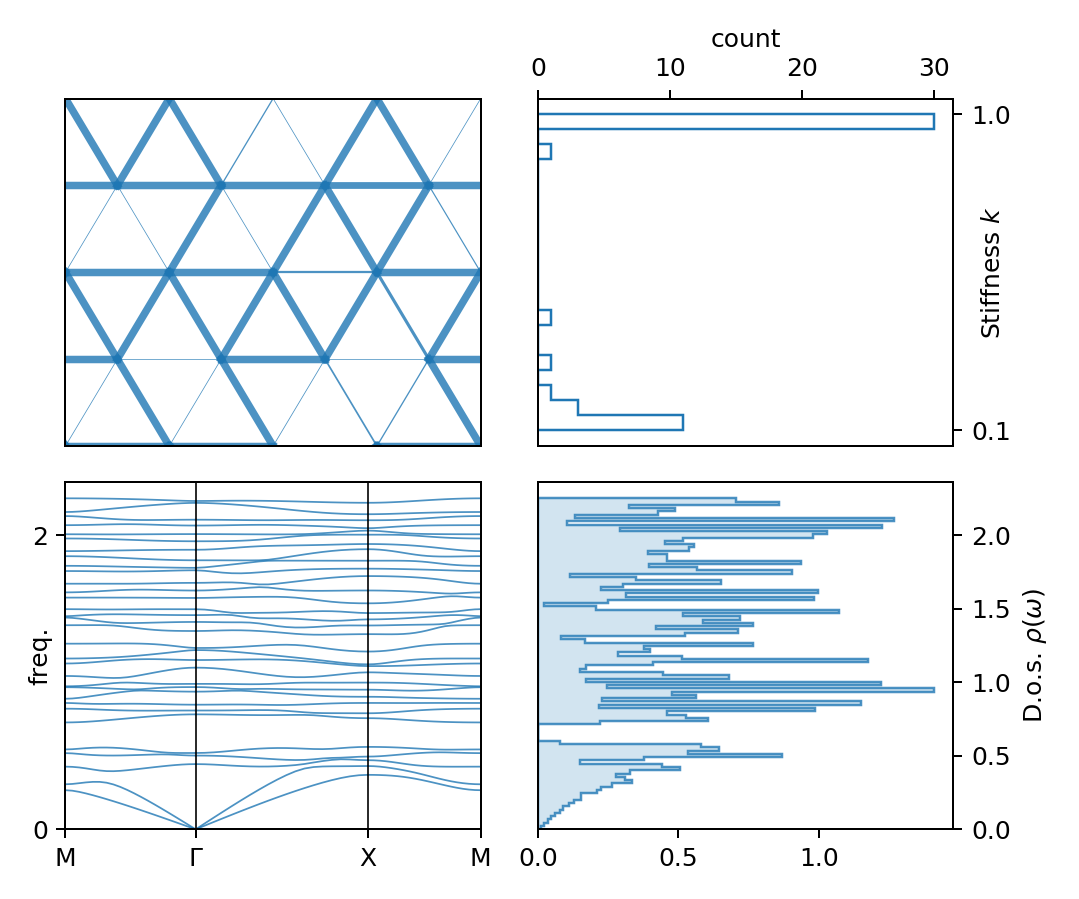

In [55]:
# plot the network and band structure

f, axs = plt.subplots(2, 2, figsize=(6, 5))

plotting.plot_result_2d(triang1, k1, axs[0,0], axs[0,1], axs[1,0], axs[1,1])

f.tight_layout()